blobs ['data', 'conv1', 'pool1', 'ip1', 'ip2']
params ['conv1', 'ip1', 'ip2']


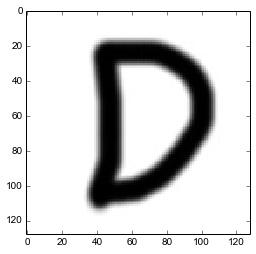

In [29]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Image
import time

plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['image.cmap'] = 'gray'

caffe.set_mode_cpu()
net = caffe.Net('deploy.prototxt','snapshot_iter_500.caffemodel', caffe.TEST)
print("blobs {}\nparams {}".format(net.blobs.keys(), net.params.keys()))

img_path = 'data/d1.jpg'

img = np.array(Image.open(img_path))/255.0
plt.imshow(img)

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
#transformer.set_mean('data', 127)
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))

#im_input = img[np.newaxis, np.newaxis, :, :]
#net.blobs['data'].reshape(*input_image.shape)

# Výpočet
x = img.reshape(3, 128, 128)
net.blobs['data'].data[...] = x

In [30]:
start = time.time()
out = net.forward()
stop = time.time()

print stop-start

0.00510811805725


In [31]:
print abs(round(out['ip2'][0][0]))

3.0


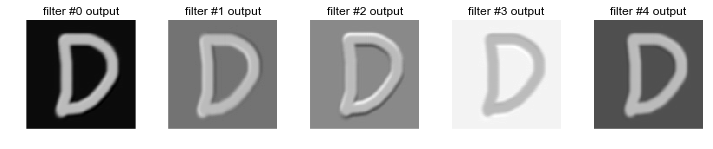

In [32]:
def show_filters(net):
    plt.figure()
    filt_min, filt_max = net.blobs['conv1'].data.min(), net.blobs['conv1'].data.max()

    for i in range(5):
        conv1 = net.blobs['conv1'].data[0][i]
        plt.subplot(1,5,i+1)
        plt.title("filter #{0} output".format(i))
        plt.imshow(conv1, vmin=filt_min, vmax=filt_max, cmap = plt.get_cmap('gray'))
        plt.tight_layout()
        plt.axis('off')

plt.rcParams['figure.figsize'] = (10, 10)
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(img_path))
net.forward()

show_filters(net)

Výstupem 